# Lab. Corner detection and ORB

At the end of this laboratory, you would get familiarized with

*   Corner Detection using FAST and Harris Corners
*   ORB feature detectors and descriptors

---

In [2]:
# mount drive to the notebook

from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import color, data, feature, filters, io, transform 

# Corner Detection

### Exercise: #1

*    Detect the corners in the image starbucks4.jpg. Use corner_fast to extract FAST corners for the given image and corner_peaks to find corners in the corner measure response image.
*   Show the original image, fast corners, peaks overlayed on the original image using matplotlib subplot.



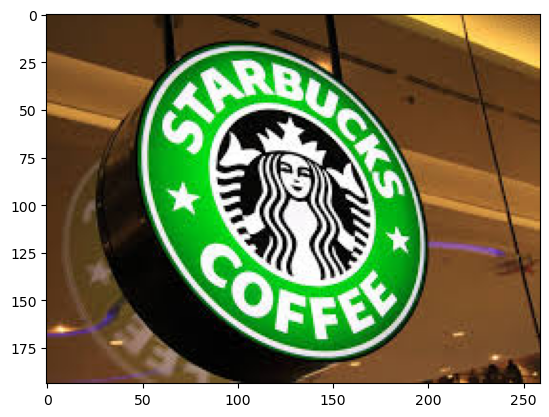

In [5]:
# solution
img = io.imread(os.path.join( "C:\\Users\\Francesco Corda\\Documents\\GitHub\\labs-cv\\3. lab-corner-detection\\images\\starbucks\\starbucks4.jpg"))

plt.imshow(img)
plt.show()


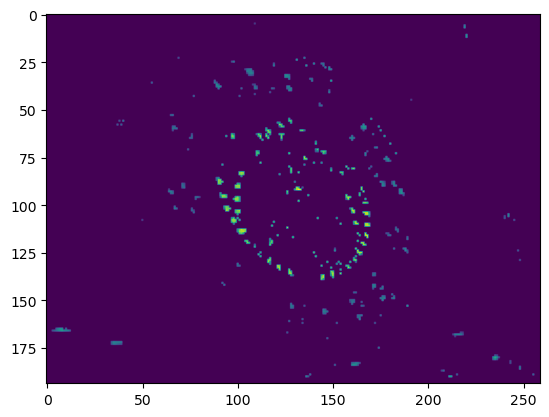

In [6]:
img = color.rgb2gray(img)

fast= feature.corner_fast(img)
plt.imshow(fast)
plt.show()

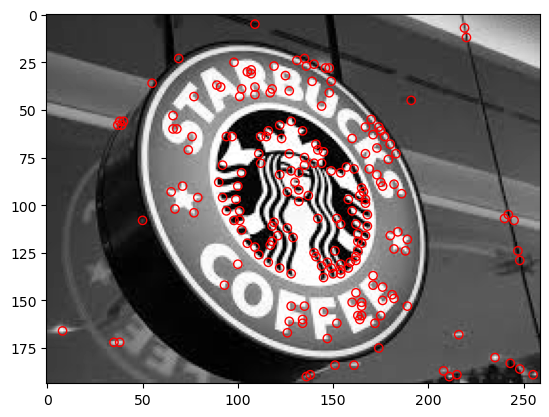

In [7]:
corner_points = feature.corner_peaks(fast)
plt.imshow(img, cmap=plt.cm.gray)
plt.scatter(corner_points[:, 1], corner_points[:, 0], facecolors='none', edgecolors='r')
plt.show()

*   Analyze and discuss the effect of changing **'threshold'** in the corner_fast function.

**Solution**

*(Double-click or enter to edit)*

...

*   Repeat the exercise by replacing FAST corners with Harris corners.

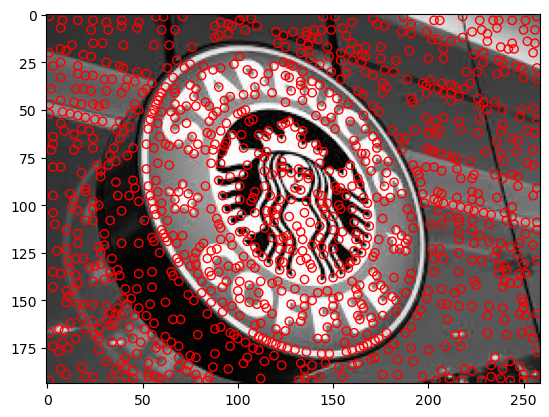

In [11]:
# solution

# Compute Harris corners
harris_corners = feature.corner_harris(img)

# Find corner points
corner_points = feature.corner_peaks(harris_corners)

# Visualize the image and corner points
plt.imshow(img, cmap=plt.cm.gray)
plt.scatter(corner_points[:, 1], corner_points[:, 0], facecolors='none', edgecolors='r')
plt.show()

*   Do you find difference between both the techniques? If so, why and what difference do you observe?

**Solution**

*(Double-click or enter to edit)*

...

# ORB feature detector and binary descriptor

### Exercise #0: Compute ORB descriptors and find descriptors match

*   Load 'astronaut' image from data module.
*   Convert the image to grayscale.
*   Create a copy of the image and rotate it by 180&deg; 



In [12]:
img1 = color.rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)

*   Create an ORB feature detector with default parameters. *Hint: ORB feature detector is available in skimage.feature module.*



In [13]:
descriptor_extractor = feature.ORB(n_keypoints=200)

*   Extract the keypoints and descriptors using detect_and_extract function for both the images

In [14]:
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

*   Descriptors can be matched using match_descriptors function available in skimage.feature module
*   The matches can be plotted using the plot_matches function available in skimage.feature module

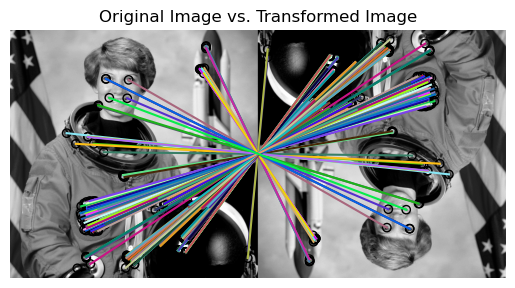

In [15]:
matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
feature.plot_matches(plt, img1, img2, keypoints1, keypoints2, matches12)
plt.axis('off')
plt.title("Original Image vs. Transformed Image")
plt.show()

### Exercise: #1

*   Analyze and discuss the effect of changing the parameter **'max_ratio'** in the match_descriptors function.

**Solution**

*(Double-click or enter to edit)*

...

*   What do you infer from **'harris_k'**, **'n_scales'**, **'fast_n'**, **'fast_threshold'** parameters in ORB function?

**Solution**

*(Double-click or enter to edit)*

...

### Exercise: #2
*   Using the above example, create a function get_ORB, that takes two images as parameters and returns the keypoints of both images and descriptor matches

In [16]:
# solution

def get_ORB(img1,img2):
    img1 = color.rgb2gray(img1)
    img2 = color.rgb2gray(img2)
    
    descriptor_extractor = feature.ORB(n_keypoints=200, fast_threshold=0.5)
    #fast_threshold=0.3, harris_k=0.04)

    #Obtaining the keypoints and the descriptor vector from the first image
    descriptor_extractor.detect_and_extract(img1)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors

    #Obtaining the keypoints and the descriptor vector from the second image
    descriptor_extractor.detect_and_extract(img2)
    keypoints2 = descriptor_extractor.keypoints
    descriptors2 = descriptor_extractor.descriptors
    
    #Generating the match descriptor matrix
    matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
    
    return matches12,keypoints1,keypoints2

*   Using the above function, detect the correspondences between the model image 'starbucks.jpg' with the scene image 'starbucks4.jpg'
*   Plot the matches between the two images.

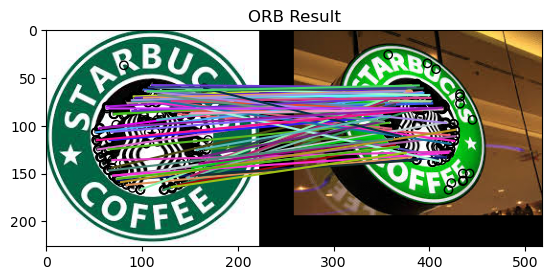

In [18]:
# solution

img1 = io.imread(os.path.join("C:\\Users\\Francesco Corda\\Documents\\GitHub\\labs-cv\\3. lab-corner-detection\\images\\starbucks\\starbucks.jpg"))
img2 = io.imread(os.path.join("C:\\Users\\Francesco Corda\\Documents\\GitHub\\labs-cv\\3. lab-corner-detection\\images\\starbucks\\starbucks4.jpg"))

#Plotting the ORB result
matches,keypoints1,keypoints2 = get_ORB(img1,img2)
f,axarray = plt.subplots()
feature.plot_matches(axarray, img1,img2,keypoints1,keypoints2,matches)
axarray.set_title('ORB Result')
plt.show()


### Exercise: #3

*   Using "starbucks.jpg" image as a model, show its matches to all Starbucks images. 
*   Show the number of the matches for the pair as title for each plot.

In [25]:
def get_ORB(img1, img2):
    # Convert images to grayscale
    img1_gray = color.rgb2gray(img1)
    img2_gray = color.rgb2gray(img2)
    
    # Compute ORB keypoints and descriptors
    orb = feature.ORB()
    try:
        keypoints1, descriptors1 = orb.detect_and_extract(img1_gray)
        keypoints2, descriptors2 = orb.detect_and_extract(img2_gray)
        
        # Match keypoints between images
        matches = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
        
        return matches, keypoints1, keypoints2
    except Exception as e:
        print(f"Error processing images: {e}")
        return None, None, None


*   Comment on the performance of the algorithm with respect to each image. When do you think the algorithm works better?

**Solution**

*(Double-click or enter to edit)*

...

### Exercise: #4

*   Repeate **Exercise #2**, by changing the orientation of the model image by rotating it and comparing it with its original version.
*   Create 8 orientations of the model image by rotating the image by 45&deg; (0, 45, 90, 135, 180, 225, 270, 315). *Hint: You can use the rotate() function from skimage.transform.*

Error processing images: cannot unpack non-iterable NoneType object


TypeError: 'NoneType' object is not subscriptable

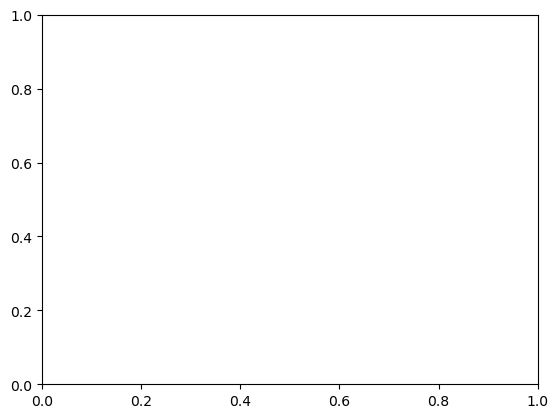

In [26]:
# solution

img = io.imread(os.path.join("C:\\Users\\Francesco Corda\\Documents\\GitHub\\labs-cv\\3. lab-corner-detection\\images\\starbucks\\starbucks.jpg"))

orientations = [0, 45, 90, 135, 180, 225, 270, 315]

for orientation in orientations:
    img2 = transform.rotate(img, orientation, resize=False)
    #Plotting the ORB result
    matches,keypoints1,keypoints2 = get_ORB(img,img2)
    f,axarray = plt.subplots()
    feature.plot_matches(axarray, img,img2,keypoints1,keypoints2,matches)
    axarray.set_title('ORB Result')
    plt.show()


*   What do you observe with respect to the change in orientations?

**Solution**

*(Double-click or enter to edit)*

...

### Exercise: #5

*   Repeat **Exercise #3** using Coco-cola images using cocacola_logo.png as the model image.
*   Does the same parameters used for Starbucks images work in this case? Or was it necessary to modify the ORB parameters?

In [44]:
# solution

cocacola_model = io.imread(os.path.join('cocacola_logo.png'))
cocacola = []
cocacola.append(io.imread(os.path.join('cocacola1.jpg')))
cocacola.append(io.imread(os.path.join('cocacola2.png')))
cocacola.append(io.imread(os.path.join('cocacola3.jpg')))
cocacola.append(io.imread(os.path.join('cocacola4.jpg')))
cocacola.append(io.imread(os.path.join('cocacola5.png')))
cocacola.append(io.imread(os.path.join('cocacola6.jpg')))

#Obtaining the different matches and keypoints from the comparison between the model image and the
#rest of them
matchm = []
keypoints = []
for i in range(5):
    m,keypointsm,k = get_ORB(cocacola_model,cocacola[i])
    matchm.append(m)
    keypoints.append(k)
    
#Plotting them
for i in range(5):
    f,axarray = plt.subplots()
    feature.plot_matches(axarray, color.rgb2gray(cocacola_model),color.rgb2gray(cocacola[i]),keypointsm,keypoints[i],matchm[i])
    axarray.set_title('ORB Match Result ' + str(len(matchm[i])))
    plt.show()

ValueError: the input array must have size 3 along `channel_axis`, got (1200, 1200, 4)

**Solution**

*(Double-click or enter to edit)*

...

### Exercise #6. Analysis of the applied techniques and results

*   What are the advantages of ORB object detection compared with HOG object detector?

**Solution**

*(Double-click or enter to edit)*

...

*   What would happen if you analyse an image that does not contain the Starbucks logo (as is the case of "edificio.jpg")?

In [ ]:
# solution



**Solution**

*(Double-click or enter to edit)*

...

*   What are the different ways of defining a quality measure for the correspondance between two images? (implementation of measures is not necessary)?

**Solution**

*(Double-click or enter to edit)*

...

# Panorama Stitching (Not graded)

Image Mosaicing is a technique of combining multiple overlapping images into a single image.

*   A simple tutorial can be found in this notebook: 
*   https://github.com/scikit-image/skimage-tutorials/blob/main/lectures/solutions/adv3_panorama-stitching-solution.ipynb